# Customer Segmentation

## Install Libraries

In [26]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square

## Load and Inspect Data

In [28]:
df = pd.read_csv('customers.csv')
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Extract Needed Features

In [29]:
X = df.iloc[:,[3,4]].values # extract all rows of the columns with index 3 and 4
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Elbow Method
- use K-means to iterate from 1 to 11 clusters and plotting an Elbow plot
- decide optimal number of clusters to be used

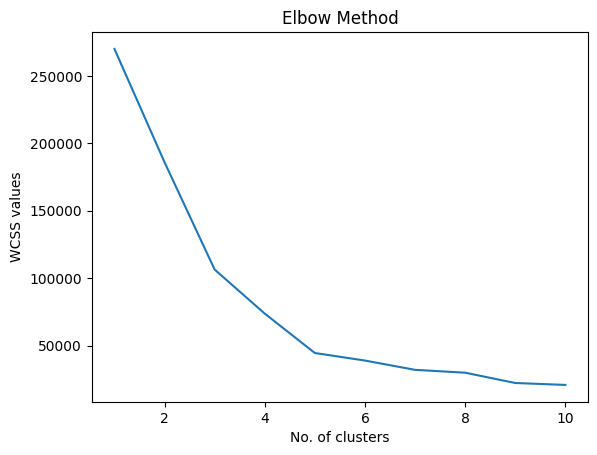

In [30]:
for i in range(1,11):
	kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
	kmeans.fit(X)
	wcss.append(kmeans.inertia_)
	
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

> Now we identified that the elbow is at 5 clusters

## Model Training
- initialize k-means model with selected optimal no. of clusters
- plot clusters, and gain intuition regarding the customers

In [31]:
k_means_model = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_k_means = k_means_model.fit_predict(X)

## Plot Results

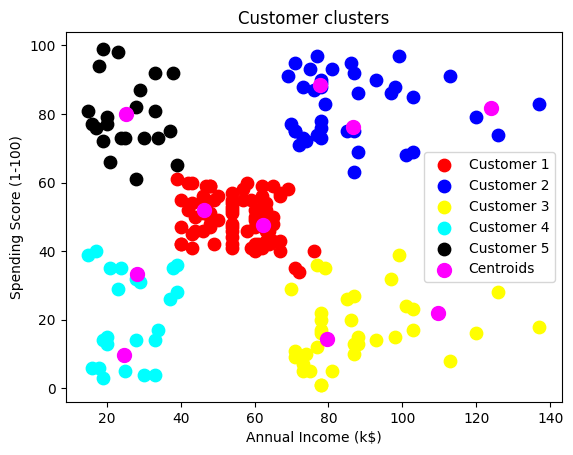

In [36]:
# Plot Customer Clusters
plt.scatter(X[y_k_means==0,0], X[y_k_means==0,1], s=80, c="red", label="Customer 1")
plt.scatter(X[y_k_means==1,0], X[y_k_means==1,1], s=80, c="blue", label="Customer 2")
plt.scatter(X[y_k_means==2,0], X[y_k_means==2,1], s=80, c="yellow", label="Customer 3")
plt.scatter(X[y_k_means==3,0], X[y_k_means==3,1], s=80, c="cyan", label="Customer 4")
plt.scatter(X[y_k_means==4,0], X[y_k_means==4,1], s=80, c="black", label="Customer 5")

# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="magenta", label="Centroids")

# Plot Config
plt.title('Customer clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()